# Chapter 3 - Modeling and prediction

In [47]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### The Titanic dataset

We use the Pandas library to import the Titanic survival dataset.

In [48]:
import pandas
data = pandas.read_csv("data/titanic.csv")
data.iloc[:, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# We make a 80/20% train/test split of the data
data_train = data[:int(0.8*len(data))]
data_test = data[int(0.8*len(data)):]

In [50]:
unique(data['Embarked'].fillna(""))

array(['', 'C', 'Q', 'S'], dtype=object)

### Preparing the data

In [51]:
# The categorical-to-numerical function from chapter 2
# Changed to automatically add column names
def cat_to_num(data):
    categories = unique(data)
    features = {}
    for cat in categories:
        binary = (data == cat)
        features["%s=%s" % (data.name, cat)] = binary.astype("int")
    return pandas.DataFrame(features)

In [52]:
def prepare_data(data):
    """Takes a dataframe of raw data and returns ML model features
    """
    
    # Initially, we build a model only on the available numerical values
    features = data.drop(["PassengerId", "Survived", "Fare", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1)
    
    # Setting missing age values to -1
    features["Age"] = data["Age"].fillna(-1)
    
    # Adding the sqrt of the fare feature
    features["sqrt_Fare"] = sqrt(data["Fare"])
    
    # Adding gender categorical value
    features = features.join( cat_to_num(data['Sex']) )
    
    # Adding Embarked categorical value
    features = features.join( cat_to_num(data['Embarked'].fillna("")) )
    
    return features

### Building a logistic regression classifier with Scikit-Learn

In [53]:
#cat_to_num(data['Sex'])
features = prepare_data(data_train)
features[:5]

,Pclass,Age,SibSp,Parch,sqrt_Fare,Sex=female,Sex=male,Embarked=,Embarked=C,Embarked=Q,Embarked=S
0,3,22.0,1,0,2.692582,0,1,0,0,0,1
1,1,38.0,1,0,8.442944,1,0,0,1,0,0
2,3,26.0,0,0,2.815138,1,0,0,0,0,1
3,1,35.0,1,0,7.286975,1,0,0,0,0,1
4,3,35.0,0,0,2.837252,0,1,0,0,0,1


In [11]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(features, data_train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
data_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
712,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S
713,714,0,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S
714,715,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C


In [56]:
#model.coef_
prepare_data(data_test)[:5]

,Pclass,Age,SibSp,Parch,sqrt_Fare,Sex=female,Sex=male,Embarked=,Embarked=C,Embarked=Q,Embarked=S
712,1,48.0,1,0,7.211103,0,1,0,0,0,1
713,3,29.0,0,0,3.079497,0,1,0,0,0,1
714,2,52.0,0,0,3.605551,0,1,0,0,0,1
715,3,19.0,0,0,2.765863,0,1,0,0,0,1
716,1,38.0,0,0,15.083932,1,0,0,1,0,0


In [57]:
# Make predictions
model.predict(prepare_data(data_test))

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [16]:
data_test["Survived"]

712    1
713    0
714    0
715    0
716    1
717    1
718    0
719    0
720    1
721    0
722    0
723    0
724    1
725    0
726    1
727    1
728    0
729    0
730    1
731    0
732    0
733    0
734    0
735    0
736    0
737    1
738    0
739    0
740    1
741    0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 179, dtype: int64

In [17]:
# The accuracy of the model on the test data
# (this will be introduced in more details in chapter 4)
print(model.score(prepare_data(data_test), data_test["Survived"]))
print(model.score(prepare_data(data_train), data_train["Survived"]))


0.8324022346368715
0.7837078651685393


In [58]:
model.predict_proba(prepare_data(data_test))

array([[0.676746  , 0.323254  ],
       [0.90003877, 0.09996123],
       [0.83203136, 0.16796864],
       [0.88968111, 0.11031889],
       [0.0489577 , 0.9510423 ],
       [0.20687588, 0.79312412],
       [0.83163814, 0.16836186],
       [0.90578565, 0.09421435],
       [0.16726348, 0.83273652],
       [0.90923922, 0.09076078],
       [0.79780709, 0.20219291],
       [0.82846976, 0.17153024],
       [0.61528532, 0.38471468],
       [0.89002217, 0.10997783],
       [0.33944357, 0.66055643],
       [0.27091708, 0.72908292],
       [0.80507264, 0.19492736],
       [0.43790827, 0.56209173],
       [0.05936342, 0.94063658],
       [0.83426786, 0.16573214],
       [0.75334554, 0.24665446],
       [0.77445649, 0.22554351],
       [0.77445649, 0.22554351],
       [0.89502865, 0.10497135],
       [0.57045093, 0.42954907],
       [0.32137895, 0.67862105],
       [0.86205828, 0.13794172],
       [0.86205828, 0.13794172],
       [0.4931804 , 0.5068196 ],
       [0.62271181, 0.37728819],
       [0.

In [15]:
model.coef_

array([[-0.86103118, -0.01263601, -0.2364916 , -0.13335933,  0.05162915,
         1.3233092 , -1.32359798,  0.07000599,  0.11038353, -0.00182877,
        -0.17884953]])

In [18]:
len(model.coef_[0])

11

In [16]:
model.intercept_

array([2.09533826])

### Non-linear model with Support Vector Machines

In [79]:
from sklearn.svm import SVC
#model = SVC(gamma=0.05)
#model = SVC(gamma=10.0)
#model = SVC(gamma=100.0)
model = SVC(gamma=0.1, C=1, probability=True)
model.fit(features, data_train["Survived"])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [80]:
print(model.score(prepare_data(data_train), data_train["Survived"]))
model.score(prepare_data(data_test), data_test["Survived"])

0.8623595505617978


0.8603351955307262

In [81]:
model.predict(prepare_data(data_test))

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0], dtype=int64)

In [82]:
model.predict_proba(prepare_data(data_test))

array([[0.60787888, 0.39212112],
       [0.84687577, 0.15312423],
       [0.83780588, 0.16219412],
       [0.84448499, 0.15551501],
       [0.40033934, 0.59966066],
       [0.21777108, 0.78222892],
       [0.83568352, 0.16431648],
       [0.83072552, 0.16927448],
       [0.09962044, 0.90037956],
       [0.87162275, 0.12837725],
       [0.69538626, 0.30461374],
       [0.76508699, 0.23491301],
       [0.45315686, 0.54684314],
       [0.83793155, 0.16206845],
       [0.42791559, 0.57208441],
       [0.17331822, 0.82668178],
       [0.73990385, 0.26009615],
       [0.34246165, 0.65753835],
       [0.49214129, 0.50785871],
       [0.14722102, 0.85277898],
       [0.83645644, 0.16354356],
       [0.83646327, 0.16353673],
       [0.83646327, 0.16353673],
       [0.85097857, 0.14902143],
       [0.57008703, 0.42991297],
       [0.17771556, 0.82228444],
       [0.8477109 , 0.1522891 ],
       [0.8477109 , 0.1522891 ],
       [0.82313165, 0.17686835],
       [0.22603896, 0.77396104],
       [0.

### Classification with multiple classes: hand-written digits

We use the popular non-linear multi-class K-nearest neighbor algorithm to predict hand-written digits from the MNIST dataset.


In [101]:
mnist = pandas.read_csv("data/mnist_small.csv")
mnist_train = mnist[:int(0.8*len(mnist))]
mnist_test = mnist[int(0.8*len(mnist)):]

In [103]:
mnist_test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
800,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
801,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
802,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
803,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
804,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
mnist_test.head()
mnist_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 800 to 999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 1.2 MB


In [145]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(mnist_train.drop("label", axis=1), mnist_train['label'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [146]:
preds = knn.predict_proba(mnist_test.drop("label", axis=1))
pandas.DataFrame(preds[:5], index=["Digit %d"%(i+1) for i in range(5)])

,0,1,2,3,4,5,6,7,8,9
Digit 1,0.000000,0.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.000000
Digit 2,0.000000,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
Digit 3,0.666667,0.0,0.0,0.0,0.000000,0.0,0.333333,0.000000,0.0,0.000000
Digit 4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.666667,0.0,0.333333
Digit 5,0.000000,0.0,0.0,0.0,0.666667,0.0,0.000000,0.000000,0.0,0.333333


In [114]:
knn.score(mnist_test.drop("label", axis=1), mnist_test['label'])

0.87

<IPython.core.display.Javascript object>


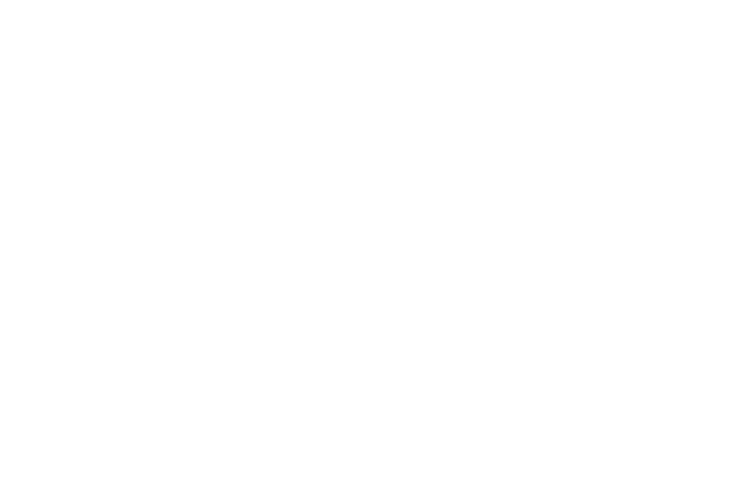

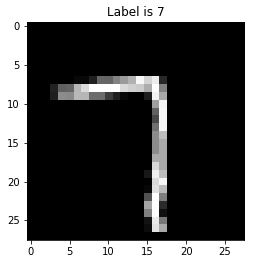

In [149]:
# Visualizza una cifra per vedere di quale si tratta visviamente

import numpy as np
import csv
import matplotlib.pyplot as plt

digit_index = 3

# The first column is the label
label = mnist_test.iloc[digit_index]['label']

# The rest of columns are pixels
pixels = mnist_test.iloc[digit_index][1:]

# Make those columns into a array of 8-bits pixels
# This array will be of 1D with length 784
# The pixel intensity values are integers from 0 to 255
pixels = np.array(pixels, dtype='uint8')

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels, cmap='gray')
plt.show()



### Predicting numerical values with a regression model

We use the the Linear Regression algorithm to predict miles-per-gallon of various automobiles.

In [115]:
auto = pandas.read_csv("data/auto-mpg.csv")

# Convert origin to categorical variable
auto = auto.join(cat_to_num(auto['origin']))
auto = auto.drop('origin', axis=1)

# Split in train/test set
auto_train = auto[:int(0.8*len(auto))]
auto_test = auto[int(0.8*len(auto)):]

auto[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin=1,origin=2,origin=3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [116]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(auto_train.drop('mpg', axis=1), auto_train["mpg"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
pred_mpg = reg.predict(auto_test.drop('mpg',axis=1))

In [118]:
pred_mpg

array([24.6036654 , 22.45237369, 30.49608108, 28.24072894, 29.09477458,
       29.64940702, 30.76771476, 31.28344794, 26.14403221, 31.13257901,
       30.91540764, 29.28851003, 25.72007068, 24.62056594, 33.21296974,
       31.16538035, 32.68886775, 26.15725948, 29.79371481, 28.91359201,
       30.47705727, 28.48645692, 27.77703745, 27.98709561, 26.43223723,
       29.37979593, 34.03148554, 31.68715292, 34.07537596, 32.22629688,
       32.46139501, 32.3639412 , 32.78353244, 30.16470726, 30.86835286,
       28.49327104, 31.40954841, 31.74011761, 30.70344   , 29.08880018,
       29.08937921, 25.17473419, 24.7549939 , 26.96622928, 26.34050554,
       22.86083116, 21.21254397, 24.7728534 , 22.88200791, 27.66702235,
       27.57642698, 29.0250432 , 28.25593971, 28.84400954, 27.51790757,
       26.79102539, 33.06568725, 32.90922153, 33.28428529, 31.28212655,
       30.79416081, 32.51104398, 32.34511414, 31.96521496, 33.609514  ,
       33.53449899, 33.31140856, 25.46185654, 26.3967759 , 28.76

# Plotting the Regression

Coefficients: 
 [-0.51030655  0.01155535 -0.01835016 -0.00565028 -0.10716429  0.58746158
 -0.97369637  0.25672466  0.71697171]
              0         0
0     cylinders -0.510307
1  displacement  0.011555
2    horsepower -0.018350
3        weight -0.005650
4  acceleration -0.107164
5     modelyear  0.587462
6      origin=1 -0.973696
7      origin=2  0.256725
8      origin=3  0.716972
Intercept: 
 -0.3498998101033308


<IPython.core.display.Javascript object>


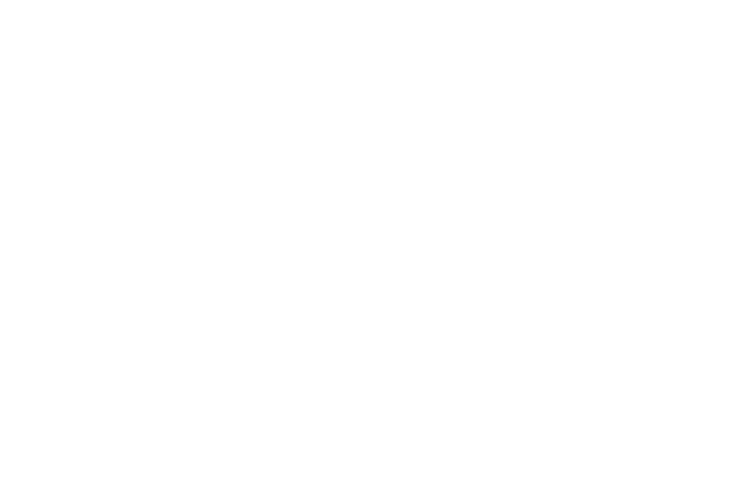

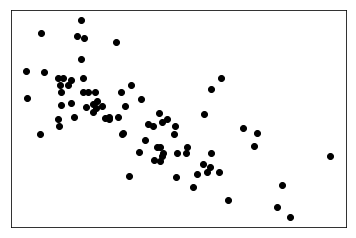

In [119]:
# The coefficients
print('Coefficients: \n', reg.coef_)
coefficients = pandas.concat([pandas.DataFrame(auto_train.drop('mpg',axis=1).columns),pandas.DataFrame(np.transpose(reg.coef_))], axis = 1)
print(coefficients)
print('Intercept: \n', reg.intercept_)

# Plot outputs
plt.scatter(auto_test.weight, auto_test.mpg,  color='black')

plt.xticks(())
plt.yticks(())

plt.show()

# Scoring the Regression

<IPython.core.display.Javascript object>


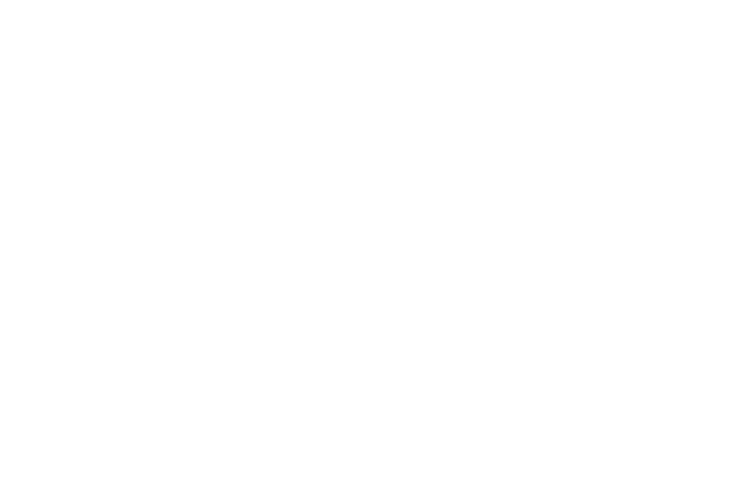

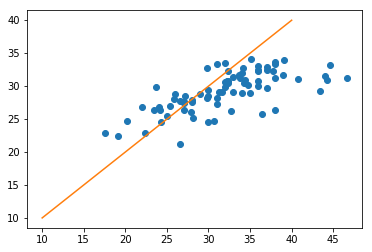

In [120]:
plot(auto_test.mpg, pred_mpg, 'o')
x = linspace(10,40,5)
plot(x, x, '-');

In [121]:
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(auto_test.mpg, pred_mpg))
print(mean_squared_error(auto_test.mpg, pred_mpg))

0.250384591653372
27.138801909284826


In [122]:
# Using model score
print(reg.score(auto_test.drop('mpg',axis=1), auto_test.mpg))

0.250384591653372
